In [2]:
# load the necessary packages 

import os
import scipy
import shutil
import numpy as np
import pandas as pd
import xarray as xr
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
cartopy.config['data_dir'] = os.getenv('CARTOPY_DIR', cartopy.config.get('data_dir'))

import plotly.express as px
import geopandas as gpd
from scipy.spatial import cKDTree

import imageio
import os
import io
import requests

import datetime as dt
from dateutil.relativedelta import *

import netCDF4
from netCDF4 import Dataset, num2date

import cmocean

import seaborn as sns
import pymannkendall as mk

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from matplotlib import pyplot as plt
%matplotlib inline

from PIL import Image  # To create gifs
from shapely.geometry import Point
from shapely.geometry import LineString

In [3]:
# Loding the cvs with all the stats for all positions 
all_stats_after = pd.read_csv('combined_stats_AFTER.csv')
all_stats_after

,var,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,temp_pos4_Mean,29.461824,29.185827,29.103344,29.094456,29.125504,29.139141,29.140380,29.094730,29.075666,...,29.255417,28.959753,28.934351,28.954609,28.743603,28.695757,28.702540,28.719805,28.707952,28.713558
1,temp_pos4_Max,29.783718,29.312428,29.398335,29.310862,29.352186,29.275187,29.227936,29.208529,29.185163,...,29.469837,29.136955,29.115461,29.143010,28.895136,28.868390,28.875546,28.990524,29.040077,29.039898
2,temp_pos4_Min,29.259352,28.948835,28.772630,28.792786,28.783375,28.870596,28.902122,28.974241,28.940100,...,29.043863,28.778446,28.740602,28.710018,28.615911,28.544220,28.445950,28.523098,28.470590,28.369263
3,temp_pos5_Mean,29.309130,29.150063,28.996784,28.964016,28.999443,29.035795,29.046364,29.017574,29.045290,...,29.098219,28.860370,28.816100,28.827497,28.730782,28.631142,28.548365,28.556920,28.529724,28.505281
4,temp_pos5_Max,29.533455,29.268225,29.227575,29.204342,29.204233,29.252916,29.244085,29.208529,29.363335,...,29.335700,29.010574,28.998184,29.094818,28.851795,28.824785,28.829636,28.793621,28.790546,28.785200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,Chl_pos35_Max,0.075354,0.076196,0.149445,0.179486,0.156263,0.126228,0.101482,0.089121,0.084858,...,0.090063,0.089985,0.096341,0.106278,0.108281,0.092855,0.091042,0.085142,0.070077,0.065702
203,Chl_pos35_Min,0.043738,0.050649,0.055550,0.056719,0.054794,0.054543,0.050198,0.046868,0.042417,...,0.037196,0.038256,0.038202,0.038159,0.039021,0.039991,0.041459,0.043528,0.041739,0.041271
204,Chl_pos36_Mean,0.066008,0.117669,0.120972,0.094148,0.086766,0.071890,0.069080,0.086831,0.088904,...,0.114528,0.102759,0.075054,0.062919,0.065821,0.064889,0.068187,0.069966,0.078630,0.097458
205,Chl_pos36_Max,0.078931,0.152891,0.171707,0.156962,0.122034,0.098728,0.109702,0.123190,0.114103,...,0.270082,0.255404,0.195269,0.128603,0.152264,0.167157,0.182100,0.187512,0.190625,0.241207


In [6]:
# Splitting the first column to 3 separate columns, based on the variable, position, and statistics
parse = all_stats_after['var'].iloc[0]
parse_split = parse.split("_")
parse_split[0]

'temp'

In [8]:
var_name = []
position = []
stats = []
for var in range(len(all_stats_after)):
    parse = all_stats_after['var'].iloc[var]
    parse_split = parse.split("_")
    parse_split
    var_name.append(parse_split[0])
    position.append(parse_split[1])
    stats.append(parse_split[2])

In [10]:
all_stats_after['var_name']  = var_name
all_stats_after['position']  = position
all_stats_after['stats']  = stats
all_stats_after

,var,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,var_name,position,stats
0,temp_pos4_Mean,29.461824,29.185827,29.103344,29.094456,29.125504,29.139141,29.140380,29.094730,29.075666,...,28.954609,28.743603,28.695757,28.702540,28.719805,28.707952,28.713558,temp,pos4,Mean
1,temp_pos4_Max,29.783718,29.312428,29.398335,29.310862,29.352186,29.275187,29.227936,29.208529,29.185163,...,29.143010,28.895136,28.868390,28.875546,28.990524,29.040077,29.039898,temp,pos4,Max
2,temp_pos4_Min,29.259352,28.948835,28.772630,28.792786,28.783375,28.870596,28.902122,28.974241,28.940100,...,28.710018,28.615911,28.544220,28.445950,28.523098,28.470590,28.369263,temp,pos4,Min
3,temp_pos5_Mean,29.309130,29.150063,28.996784,28.964016,28.999443,29.035795,29.046364,29.017574,29.045290,...,28.827497,28.730782,28.631142,28.548365,28.556920,28.529724,28.505281,temp,pos5,Mean
4,temp_pos5_Max,29.533455,29.268225,29.227575,29.204342,29.204233,29.252916,29.244085,29.208529,29.363335,...,29.094818,28.851795,28.824785,28.829636,28.793621,28.790546,28.785200,temp,pos5,Max
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,Chl_pos35_Max,0.075354,0.076196,0.149445,0.179486,0.156263,0.126228,0.101482,0.089121,0.084858,...,0.106278,0.108281,0.092855,0.091042,0.085142,0.070077,0.065702,Chl,pos35,Max
203,Chl_pos35_Min,0.043738,0.050649,0.055550,0.056719,0.054794,0.054543,0.050198,0.046868,0.042417,...,0.038159,0.039021,0.039991,0.041459,0.043528,0.041739,0.041271,Chl,pos35,Min
204,Chl_pos36_Mean,0.066008,0.117669,0.120972,0.094148,0.086766,0.071890,0.069080,0.086831,0.088904,...,0.062919,0.065821,0.064889,0.068187,0.069966,0.078630,0.097458,Chl,pos36,Mean
205,Chl_pos36_Max,0.078931,0.152891,0.171707,0.156962,0.122034,0.098728,0.109702,0.123190,0.114103,...,0.128603,0.152264,0.167157,0.182100,0.187512,0.190625,0.241207,Chl,pos36,Max


In [13]:
# Calculate the average of each row to normalise the entire dataset 
all_stats_after['Row_Average'] = all_stats_after.iloc[:, 1:23].mean(axis=1)

# Create a new DataFrame with the same first two columns
norm_allstats_after = all_stats_after.copy()

# Subtract each entry from the row average for columns 1 to 23
standardized_columns = all_stats_after.iloc[:, 1:23].subtract(all_stats_after['Row_Average'], axis=0)

# Add the standardised columns to the new DataFrame
standardized_columns['stats'] = norm_allstats_after['stats']
standardized_columns['position'] = norm_allstats_after['position']
standardized_columns['var_name'] = norm_allstats_after['var_name']
norm_after = standardized_columns.copy()
norm_after

,1,2,3,4,5,6,7,8,9,0,...,16,17,18,19,20,21,22,stats,position,var_name
0,0.460446,0.184449,0.101966,0.093078,0.124126,0.137763,0.139002,0.093352,0.074288,0.193839,...,-0.046769,-0.257775,-0.305621,-0.298838,-0.281573,-0.293426,-0.287820,Mean,pos4,temp
1,0.590927,0.119637,0.205544,0.118071,0.159395,0.082396,0.035145,0.015738,-0.007628,0.099211,...,-0.049781,-0.297655,-0.324401,-0.317245,-0.202267,-0.152714,-0.152893,Max,pos4,temp
2,0.465827,0.155310,-0.020895,-0.000739,-0.010150,0.077071,0.108597,0.180716,0.146575,0.319049,...,-0.083507,-0.177614,-0.249305,-0.347575,-0.270427,-0.322935,-0.424262,Min,pos4,temp
3,0.411517,0.252450,0.099171,0.066403,0.101830,0.138182,0.148751,0.119961,0.147677,0.248086,...,-0.070116,-0.166831,-0.266471,-0.349248,-0.340693,-0.367889,-0.392332,Mean,pos5,temp
4,0.425111,0.159881,0.119231,0.095998,0.095889,0.144572,0.135741,0.100185,0.254991,0.171800,...,-0.013526,-0.256549,-0.283559,-0.278708,-0.314723,-0.317798,-0.323144,Max,pos5,temp
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,-0.023546,-0.022704,0.050545,0.080585,0.057363,0.027327,0.002582,-0.009779,-0.014042,-0.032797,...,0.007378,0.009381,-0.006045,-0.007858,-0.013758,-0.028823,-0.033198,Max,pos35,Chl
203,-0.000431,0.006480,0.011381,0.012550,0.010626,0.010375,0.006030,0.002699,-0.001751,-0.003242,...,-0.006009,-0.005147,-0.004177,-0.002710,-0.000641,-0.002429,-0.002898,Min,pos35,Chl
204,-0.019869,0.031793,0.035095,0.008271,0.000889,-0.013986,-0.016797,0.000954,0.003027,-0.008202,...,-0.022958,-0.020056,-0.020988,-0.017690,-0.015911,-0.007247,0.011581,Mean,pos36,Chl
205,-0.080373,-0.006414,0.012402,-0.002343,-0.037271,-0.060577,-0.049603,-0.036115,-0.045202,-0.069674,...,-0.030702,-0.007041,0.007852,0.022795,0.028207,0.031320,0.081902,Max,pos36,Chl


In [15]:
day_row = np.arange(1, 23)
day_row

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22])

In [58]:
# Creating a function to generate dataframes for all variables and statistics

def get_indices(lst, targets):
    return list(filter(lambda x: lst[x] in targets, range(len(lst))))
    
def getVarStat(vname, stat):
    '''
    Extract from the dataframe the required values
    '''
    
    idx = get_indices(norm_after['var_name'], [vname])
    tmpdf = norm_after.iloc[idx].reset_index()
    del tmpdf['index']
    tmpdf
    
    idx = get_indices(tmpdf['stats'], [stat])
    tmpStat = tmpdf.iloc[idx].reset_index()
    del tmpStat['index']
    
    return tmpStat

# Creating a function to generate the trendlines of the anomalies 

def getTrend(df):
    tmp = []
    shiftx = []
    day_row = df.iloc[0, 1:22].values.astype(float)  # creating an array of days 1 to 22 to use as the x-axis
    for pos in range(len(df)):
        tmpval = df.iloc[pos].values[1:22]
#        ishift = df.iloc[pos].values[-4]
        x = day_row
        tmp.append(tmpval)
        shiftx.append(x)
    xscatter = np.asarray(shiftx, dtype=float).flatten()
    yscatter = np.asarray(tmp, dtype=float).flatten()
    ind = np.argsort(xscatter)
    fit = np.polyfit(xscatter[ind], yscatter[ind], deg=20) 
    p = np.poly1d(fit) 

    return [xscatter[ind],p(xscatter[ind])]


In [60]:
# Creating a function to generate the scatter plots & trendlines of the anomalies 

def plotVarStat(df):
    tmp = []
    shiftx = []
    day_row = df.iloc[0, 1:22].values.astype(float)
    for pos in range(len(df)):
        tmpval = df.iloc[pos].values[1:22]
#        ishift = df.iloc[pos].values[-4]
        x = day_row
        tmp.append(tmpval)
        shiftx.append(x)
        plt.scatter(x, tmpval)
    xscatter = np.asarray(shiftx, dtype=float).flatten()
    yscatter = np.asarray(tmp, dtype=float).flatten()
    ind = np.argsort(xscatter)
    
# Fit a polynomial and plot the trendline 
    fit = np.polyfit(xscatter[ind], yscatter[ind], deg=20) 
    p = np.poly1d(fit) 
    plt.plot(xscatter[ind],p(xscatter[ind]),"r--", lw=2) 
    plt.show()

    return [xscatter[ind],p(xscatter[ind])]

In [62]:
chl_min = getVarStat('Chl','Min')
chl_mean = getVarStat('Chl','Mean')
chl_max = getVarStat('Chl','Max')

temp_min = getVarStat('temp','Min')
temp_mean = getVarStat('temp','Mean')
temp_max = getVarStat('temp','Max')

Secchi_min = getVarStat('Secchi','Min')
Secchi_mean = getVarStat('Secchi','Mean')
Secchi_max = getVarStat('Secchi','Max')

/var/folders/hk/zsnq07m15bj1ldz1jnp2l_qc0000gn/T/ipykernel_48102/3058453108.py:19: RankWarning: Polyfit may be poorly conditioned
  fit = np.polyfit(xscatter[ind], yscatter[ind], deg=20)


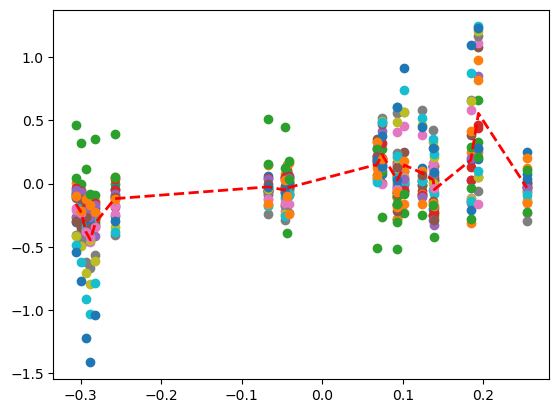

In [64]:
min_chl = plotVarStat(temp_mean) # only this line outputs a scatter plots, the rest are just trendlines 


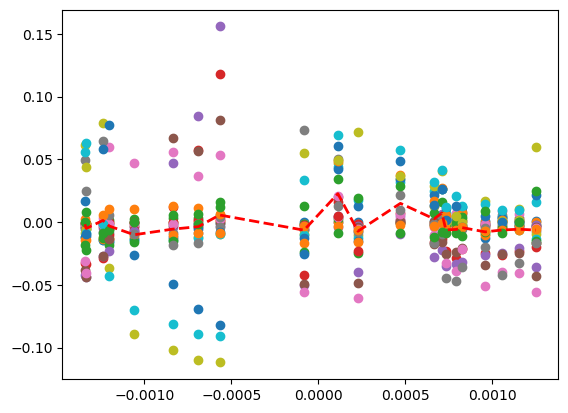

/var/folders/hk/zsnq07m15bj1ldz1jnp2l_qc0000gn/T/ipykernel_48102/1228714258.py:37: RankWarning: Polyfit may be poorly conditioned
  fit = np.polyfit(xscatter[ind], yscatter[ind], deg=20)
/var/folders/hk/zsnq07m15bj1ldz1jnp2l_qc0000gn/T/ipykernel_48102/1228714258.py:37: RankWarning: Polyfit may be poorly conditioned
  fit = np.polyfit(xscatter[ind], yscatter[ind], deg=20)
/var/folders/hk/zsnq07m15bj1ldz1jnp2l_qc0000gn/T/ipykernel_48102/1228714258.py:37: RankWarning: Polyfit may be poorly conditioned
  fit = np.polyfit(xscatter[ind], yscatter[ind], deg=20)
/var/folders/hk/zsnq07m15bj1ldz1jnp2l_qc0000gn/T/ipykernel_48102/1228714258.py:37: RankWarning: Polyfit may be poorly conditioned
  fit = np.polyfit(xscatter[ind], yscatter[ind], deg=20)
/var/folders/hk/zsnq07m15bj1ldz1jnp2l_qc0000gn/T/ipykernel_48102/1228714258.py:37: RankWarning: Polyfit may be poorly conditioned
  fit = np.polyfit(xscatter[ind], yscatter[ind], deg=20)


In [66]:
min_chl = plotVarStat(chl_min) # only this line outputs a scatter plots, the rest are just trendlines 
mean_chl = getTrend(chl_mean)
max_chl = getTrend(chl_max)

min_t = getTrend(temp_min)
mean_t = getTrend(temp_mean)
max_t = getTrend(temp_max)

min_se = getTrend(Secchi_min)
mean_se = getTrend(Secchi_mean)
max_se = getTrend(Secchi_max)